- 본격적으로 모델 training하기 전에, 이게 쉬운 task인지 궁금해서 간단히 PCA 찍어보기로 함.
    - 각 sequence는 간단하게 k-mer frequency로 vectorize
- Test data는 건드리지 않음.

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "4" # export OMP_NUM_THREADS=4
os.environ["OPENBLAS_NUM_THREADS"] = "4" # export OPENBLAS_NUM_THREADS=4 
os.environ["MKL_NUM_THREADS"] = "6" # export MKL_NUM_THREADS=6
os.environ["VECLIB_MAXIMUM_THREADS"] = "4" # export VECLIB_MAXIMUM_THREADS=4
os.environ["NUMEXPR_NUM_THREADS"] = "6" # export NUMEXPR_NUM_THREADS=6

In [2]:
import numpy as np
import pandas as pd
import itertools
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("data/train.csv")
df

,seq,target
0,CTCGGGCTATCTCTTAGCGCA,0
1,TTGCTTTAGCTCGAAGTGCAC,0
2,CTCAGATAGTGGAGGAGGACC,1
3,CCAACCAGGGCTCGGTCTTTT,0
4,AGAAAAACAAGCAGGTTCTTG,1
...,...,...
26176,TCTTTCCCTTACTTCCAGATA,0
26177,CAGCATCTTTCACGTGGTTAA,0
26178,ATTACATCTTCGGCGTCCTAA,0
26179,TGGACTGACTCGATGTCCTCG,0


In [4]:
k = 4

kmers = ["".join(v) for v in itertools.product(*["ACGT"] * k)]
kmer2idx = {kmer:i for i, kmer in enumerate(kmers)}

def to_kmer_vector(seq, k=5):
    v = np.zeros(4 ** k)
    for i in range(len(seq) - k + 1):
        kmer = seq[i: i+k]
        
        v[kmer2idx[kmer]] += 1
    
    return v

kmer_vectors = []
for seq in df.seq.values:
    kmer_vectors.append(to_kmer_vector(seq, k=k))
    
kmer_vectors = np.vstack(kmer_vectors)

In [13]:
pc[df.index[df.target == 1]]

array([[-3.12671279, -1.82736185],
       [-2.2637574 ,  0.32423482],
       [-1.41791316,  2.96426773],
       ...,
       [-3.59229598, -3.17151204],
       [-0.23603544, -1.44564604],
       [-0.9988803 , -3.2307878 ]])

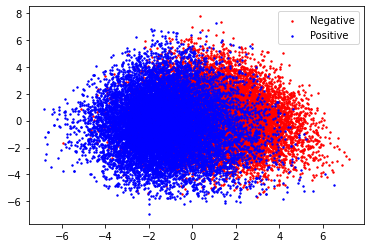

In [24]:
pca = PCA(n_components=2)
pc = pca.fit_transform(StandardScaler().fit_transform(kmer_vectors))

plt.scatter(pc[df.index[df.target == 0], 0], pc[df.index[df.target == 0], 1], s=2, label="Negative", c="r")
plt.scatter(pc[df.index[df.target == 1], 0], pc[df.index[df.target == 1], 1], s=2, label="Positive", c="b")
plt.legend()
plt.show()

- 간단한 k-mer frequency vector로 어느 정도 cluster가 나뉘기는 하는데, 깔끔하게는 나뉘지 않음.